# Spatial Domain Filtering

Contents:
- Blurring using Mean Filtering
- Sharpening using Unsharp Mask

Author: Abijith J. Kamath, IISc., https://kamath-abhijith.github.io

In [86]:
import numpy as np

from skimage import io
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [87]:
## HELPER FUNCTIONS

# FULL-SCALE CONTRAST STRETCH
def fscs(image):
    image = np.double(image)

    return (255/(np.max(image)-np.min(image)))*(image - np.min(image))

## Mean Filtering

In [88]:
## FUNCTION DEFINITION: MEAN FILTERING

def mean_filter(image, kernel_size=5):
    blur_kernel = np.ones((kernel_size,kernel_size))/(kernel_size)**2

    return signal.convolve2d(image, blur_kernel, mode='same', boundary='fill', fillvalue=0)

In [89]:
## READ IMAGE
image = io.imread('noisy.tif', 0)

## MEAN FILTERING
clean_image5 = mean_filter(image)
clean_image10 = mean_filter(image, 10)
clean_image15 = mean_filter(image, 15)

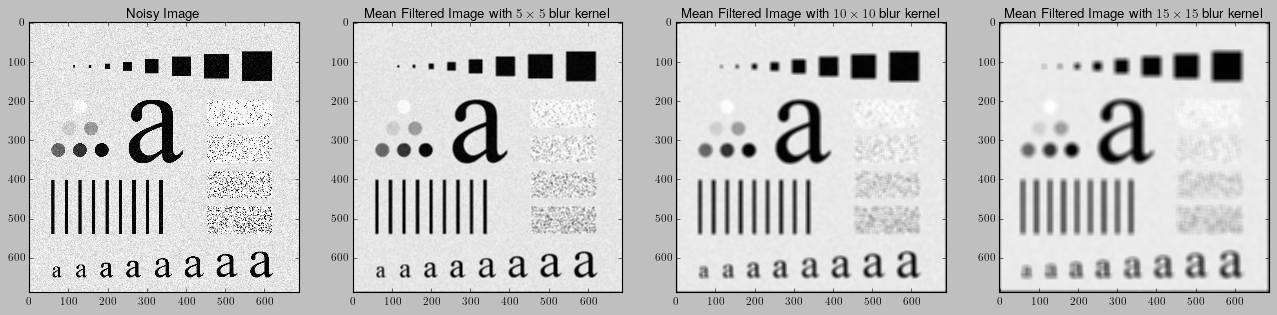

In [90]:
## PLOTS: MEAN FILTERING
style.use('classic')

rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(1,4,figsize=(20,6))
plts[0].imshow(image, cmap='gray')
plts[0].set_title(r"Noisy Image")

plts[1].imshow(clean_image5, cmap='gray')
plts[1].set_title(r"Mean Filtered Image with $5\times 5$ blur kernel")

plts[2].imshow(clean_image10, cmap='gray')
plts[2].set_title(r"Mean Filtered Image with $10\times 10$ blur kernel")

plts[3].imshow(clean_image15, cmap='gray')
plts[3].set_title(r"Mean Filtered Image with $15\times 15$ blur kernel")
plt.show()

## Unsharp Masking / High-Boost Filtering

Let $f$ be an image and $\bar{f}$ be its blurred version. High-boost filtering of $f$ is the sharpened image $g_{\text{sharp}}$ given by:

\begin{equation}
    g_{\text{sharp}} = f + k(f - \bar{f}), \; k\geq 1.
\end{equation}
When $k=1$ the trasformation is called unsharp masking and when $k>1$, the trasformation is called high-boost filtering.

In [91]:
## FUNCTION DEFINITION: UNSHARP MASKING

def unsharp_mask(image, blur_kernel_size=10, boost=1):

    blur_image = mean_filter(image, blur_kernel_size)
    sharp = image + boost*(image - blur_image)

    return fscs(sharp)

In [105]:
## UNSHARP MASKING

true_image = io.imread('characters.tif', 0)
blur_radius = 2

boost_vals = np.linspace(0,2)
mse_vals = []
for i in range(len(boost_vals)):
    sharp_image = unsharp_mask(clean_image10, blur_radius, boost_vals[i])
    mse_vals.append(np.square(sharp_image - true_image).mean())

lmse_idx = np.argmin(mse_vals)
sharp_image = unsharp_mask(clean_image10, blur_radius, boost_vals[lmse_idx])

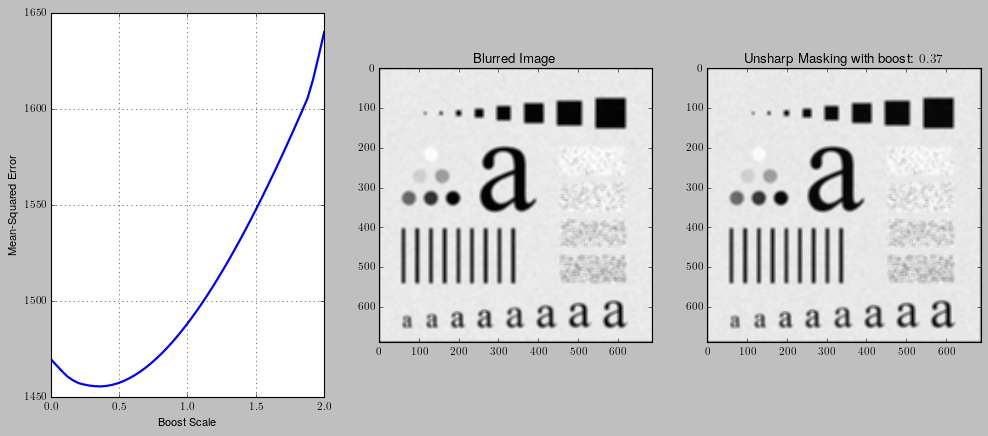

In [106]:
## PLOTS: UNSHARP MASKING

fig, plts = plt.subplots(1,3,figsize=(15,6))
plts[0].plot(boost_vals, mse_vals, linewidth=2)
plts[0].grid()
plts[0].set_xlabel(r"Boost Scale")
plts[0].set_ylabel(r"Mean-Squared Error")

plts[1].imshow(clean_image10, cmap='gray')
plts[1].set_title(r"Blurred Image")

plts[2].imshow(sharp_image, cmap='gray')
plts[2].set_title(r"Unsharp Masking with boost: $%.2f$"%(boost_vals[lmse_idx]))

plt.show()